# Mod 2 Project Visualization Notebook
### Amir Edris, Ben Inoyatov
---

In [110]:
!git status

On branch amir_wip
Changes not staged for commit:
  (use "git add/rm <file>..." to update what will be committed)
  (use "git checkout -- <file>..." to discard changes in working directory)

	modified:   student_regression_project.ipynb
	deleted:    test_notebook.ipynb

Untracked files:
  (use "git add <file>..." to include in what will be committed)

	.ipynb_checkpoints/Visualizations-checkpoint.ipynb
	.ipynb_checkpoints/data_cleaning-checkpoint.ipynb
	.ipynb_checkpoints/dc_wip-checkpoint.ipynb
	.ipynb_checkpoints/student_regression_project-checkpoint.ipynb
	MathClassCleaned.csv
	MathClassOriginal.csv
	PortugeseClassCleaned.csv
	PortugeseClassOriginal.csv
	Regression.ipynb
	Visualizations.ipynb
	averge_g3_failures.png
	data_cleaning.ipynb
	dc_wip.ipynb
	features.pkl
	mFeatures.csv
	m_Features.csv
	m_corr_matrix.png
	m_feature.pkl
	medu_fedu_g3_mean.png
	pFeatures.csv
	p_Features.csv
	p_corr_matrix.png
	p_feature.pkl
	testP.csv
	untitled folder 4.zip
	untitled folder 4/
	violinplot_g3_

In [90]:
# importing the standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
from pandas_profiling import ProfileReport
from statsmodels.formula.api import ols
import scipy.stats as stats
import pickle as pkl

plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', 500)

In [68]:
# Bring in our data from data_cleaning notebook
features = pkl.load(open('features.pkl','rb'))
m_feature = pkl.load(open('m_feature.pkl','rb'))
p_feature = pkl.load(open('p_feature.pkl','rb'))


# original data set for math class
m_orig = pd.read_csv('MathClassOriginal.csv')
m_orig = m_orig.drop('Unnamed: 0',axis =1)

# original dataset for language arts class
p_orig = pd.read_csv('PortugeseClassOriginal.csv')
p_orig = p_orig.drop('Unnamed: 0',axis =1)

m = pd.read_csv('MathClassCleaned.csv')
m = m.drop(columns='Unnamed: 0')
p = pd.read_csv('PortugeseClassCleaned.csv')
p = p.drop(columns='Unnamed: 0')

In [79]:
# Initially we did not want to use guardian and school but we've decided to make dummies for guardian and school. More on that later 
p_feature = pd.get_dummies(p_feature, columns=['guardian'])
p_feature.drop(columns=['guardian_other'], inplace=True)
p_feature = pd.get_dummies(p_feature, columns=['school'], drop_first=True, prefix='school')

m_feature = pd.get_dummies(m_feature, columns=['guardian'])
m_feature.drop(columns=['guardian_other'], inplace=True)
m_feature = pd.get_dummies(m_feature, columns=['school'], drop_first=True, prefix='school')

p_dummy = pd.get_dummies(p, columns=['guardian'])
p_dummy.drop(columns=['guardian_other'], inplace=True)
p_dummy = pd.get_dummies(p_dummy, columns=['school'], drop_first=True, prefix='school')

m_dummy = pd.get_dummies(m, columns=['guardian'])
m_dummy.drop(columns=['guardian_other'], inplace=True)
m_dummy = pd.get_dummies(m_dummy, columns=['school'], drop_first=True, prefix='school')

In [73]:
p['super'] = p_feature['super']
m['super'] = m_feature['testsuper']

In [80]:
m_dummy.head()

,sex,age,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,address_type_Urban,famsize_BIG_FAMILY,Pstatus_Together,Mjob_at_home,Mjob_health,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_reputation,tutor,super,guardian_father,guardian_mother,school_MS
0,F,18,4,4,2,2,0,1,0,0,1,1,0,0,4,3,4,1,1,3,6,5,6,6,1,1,0,1,0,0,0,0,0,0,1,1,0,0,0,16.0,0,1,0
1,F,17,1,1,1,2,0,0,1,0,0,1,1,0,5,3,3,1,1,3,4,5,5,6,1,1,1,1,0,0,0,0,0,0,0,1,0,0,0,15.5,1,0,0
2,F,15,1,1,1,2,3,1,0,0,1,1,1,0,4,3,2,2,3,3,10,7,8,10,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,7.5,0,1,0
3,F,15,4,2,1,3,0,0,1,1,1,1,1,1,3,2,2,1,1,5,2,15,14,15,1,1,1,0,1,0,0,0,0,1,0,0,1,0,1,26.5,0,1,0
4,F,16,3,3,1,2,0,0,1,0,1,1,0,0,4,3,2,1,2,5,4,6,10,10,1,1,1,0,0,0,0,0,0,0,0,0,1,0,1,21.5,1,0,0


### Making a correlation matrix for our cleaned datasets
- Take note of the relationship between G1, G2 and G3

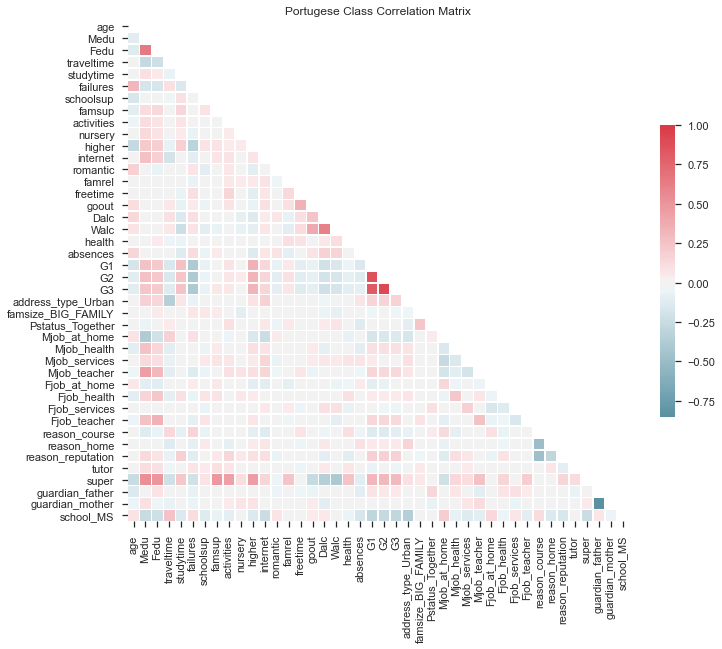

In [82]:
sns.set(style='ticks')

# Compute the correlation matrix
corr = p_dummy.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Portugese Class Correlation Matrix')
plt.show;
plt.savefig('p_corr_matrix.png')

### Now for the Math class
- Similiar correlations

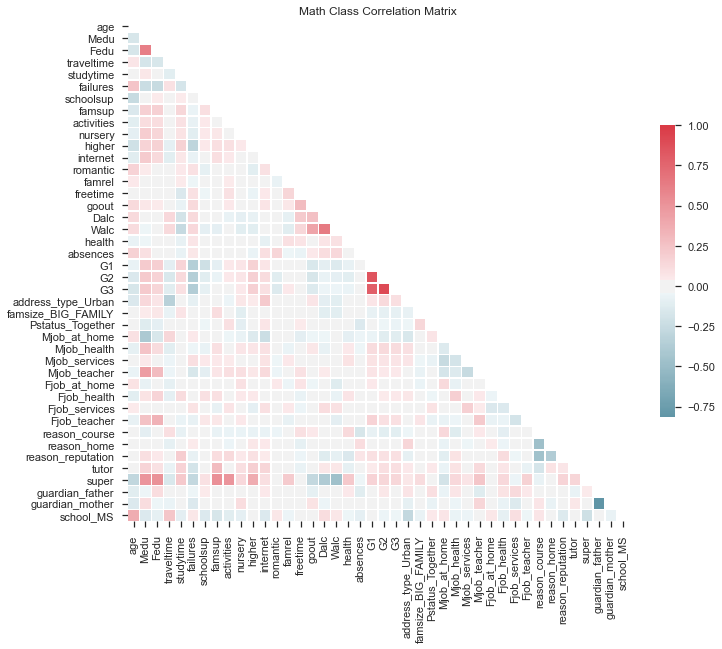

In [83]:
sns.set(style='ticks')

# Compute the correlation matrix
corr = m_dummy.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Math Class Correlation Matrix')
plt.show;
plt.savefig('m_corr_matrix.png')

## EDA
---
### First looks

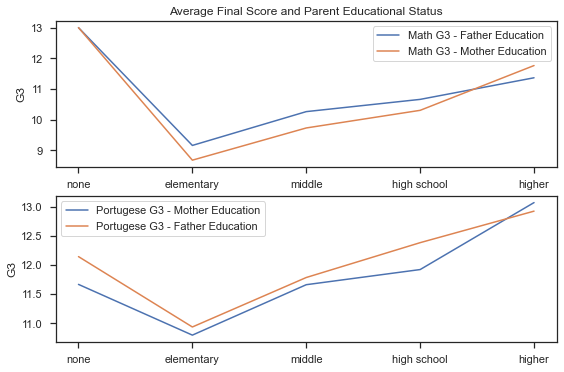

In [88]:
fmmean = m.groupby('Fedu')['G3'].mean()
mmmean = m.groupby('Medu')['G3'].mean()
fpmean = p.groupby('Fedu')['G3'].mean()
mpmean = p.groupby('Medu')['G3'].mean()

fig, (ax, ax1) = plt.subplots(2)
ax.plot(fmmean, label='Math G3 - Father Education');
ax.plot(mmmean, label='Math G3 - Mother Education');
ax1.plot(mpmean, label='Portugese G3 - Mother Education');
ax1.plot(fpmean, label='Portugese G3 - Father Education');

ax.set_ylabel('G3')
ax.set_xticklabels(['none', 'elementary', 'middle', 'high school', 'higher'])
ax.set_xticks(ticks=[0,1,2,3,4])

ax1.set_ylabel('G3')
ax1.set_xticks(ticks=[0,1,2,3,4])
ax1.set_xticklabels(['none', 'elementary', 'middle', 'high school', 'higher'])

ax.legend()
ax1.legend()

plt.savefig('medu_fedu_g3_mean.png')
ax.set_title('Average Final Score and Parent Educational Status')
plt.show;

- We have grades for students whose parents' have 'none' as their education level. We must remember that this data was acquired by questionarre which leaves to error bias.  
- We will now do T-Tests between mother and father education for each class and between classes

In [115]:
# t test showing that there is no significant difference between the two parents education level and mean math G3 score
t_stat, pval =  stats.ttest_ind(fmmean,mmmean)
print('Math: ')
print(f'T-Stastic: {t_stat}, p-value: {pval}')
print('Fail to reject null hypothesis')
print('\r')

# same test for portugese
t_stat, pval =  stats.ttest_ind(fpmean,mpmean)
print('Portugese: ')
print(f'T-Stastic: {t_stat}, p-value: {pval}')
print('Fail to reject null hypothesis')
print('\r')
# t test showing that there is no significant difference between the two parents education level and mean math G3 score
t_stat, pval =  stats.ttest_ind(fpmean,fmmean)
print('Father across classes: ')
print(f'T-Stastic: {t_stat}, p-value: {pval}')
print('Fail to reject null hypothesis')
print('\r')

# same test for portugese
t_stat, pval =  stats.ttest_ind(mpmean,mmmean)
print('Mother across classes: ')
print(f'T-Stastic: {t_stat}, p-value: {pval}')
print('Fail to reject null hypothesis')


Math: 
T-Stastic: 0.195594639943686, p-value: 0.849804102785402
Fail to reject null hypothesis

Portugese: 
T-Stastic: 0.4277377756665871, p-value: 0.6801233358809935
Fail to reject null hypothesis

Father across classes: 
T-Stastic: 1.5943519896777092, p-value: 0.14952325777970835
Fail to reject null hypothesis

Mother across classes: 
T-Stastic: 1.3356549830011744, p-value: 0.21841157684509763
Fail to reject null hypothesis


---
### Failures

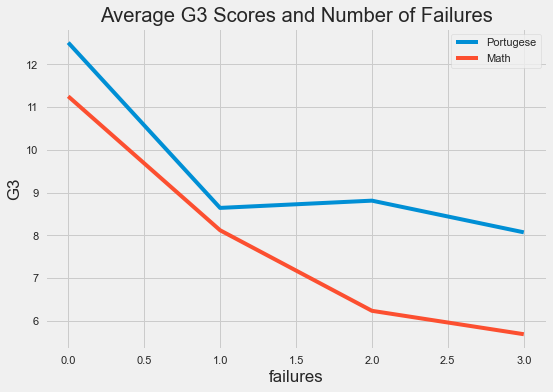

In [118]:
a = p.groupby('failures')['G3'].mean()
b = m.groupby('failures')['G3'].mean()
a.plot(label='Portugese')
b.plot(label='Math')
plt.ylabel('G3')
plt.title("Average G3 Scores and Number of Failures")
plt.savefig('averge_g3_failures.png');
plt.legend()
plt.show;

### Plotting the distribution of those failures

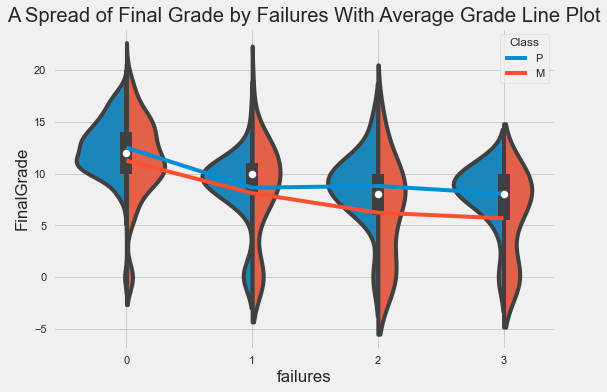

In [117]:
JointFailData = list(p.failures)
JointGradeData = list(p.G3)
JointClassType = ['P' for x in JointFailData]
mathtuples = list(zip(list(m.failures),list(m.G3)))

for i,v in mathtuples:
    JointFailData.append(i)
    JointGradeData.append(v)
    JointClassType.append('M')
jointlist = list(zip(JointFailData,JointGradeData,JointClassType))

jointdf = pd.DataFrame(data = jointlist, columns = ['Failures','FinalGrade','Class'])
jointdf

ax = sns.violinplot(x="Failures", y="FinalGrade", hue="Class", split=True, data=jointdf)
j = p.groupby('failures')['G3'].mean()
k = m.groupby('failures')['G3'].mean()
j.plot()
k.plot()

plt.savefig('violinplot_g3_failures.png')
plt.title('A Spread of Final Grade by Failures With Average Grade Line Plot')
plt.show;

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U32'), dtype('<U32')) -> dtype('<U32')

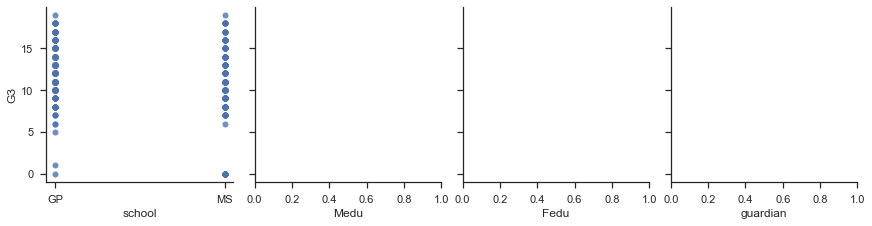

In [87]:
# #break the colums in to groups to plot 4 on a row at a time
# n = 4
# row_groups= [features[i:i+n] for i in range(0, len(features), n) ]
# for i in row_groups:
#     pp = sns.pairplot(data=p, y_vars=['G3'],x_vars=i, kind="reg", height=3)

In [ ]:
# for i in p_feature:
#     x = p_feature[i]
#     sns.boxplot(x=x, y=p.G3)
#     plt.show()

In [ ]:
# for i in p_feature:
#     x = p_feature[i]
#     sns.jointplot(x=x, y=p.G3)
#     plt.show()

In [ ]:
# for i in p_feature:
#     x = p_feature[i]
#     sns.violinplot(x=x, y=p.G3)
#     plt.show()

In [ ]:
# for i in p_feature:
#     x = p_feature[i]
#     sns.regplot(x=x, y=p.G3)
#     plt.show()

In [ ]:
# for i in p_feature:
#     x = p_feature[i]
#     sns.barplot(x=x, y=p.G3)
#     plt.show()

## Initial Regression Models
- Take note of failures. It has a high negative coefficient and a low p-value. We reject the null. 
- higher and reason_reputation are among the highest positive coefficients

In [119]:
model = ols(data = p,formula='G3~studytime+failures+schoolsup+higher+freetime+Dalc+Walc+health+address_type_Urban+Pstatus_Together+Mjob_health+Mjob_services+Mjob_teacher+Fjob_health+Fjob_services+reason_course+reason_home+reason_reputation+super').fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.314
Model:                            OLS   Adj. R-squared:                  0.293
Method:                 Least Squares   F-statistic:                     15.15
Date:                Sat, 12 Sep 2020   Prob (F-statistic):           3.18e-40
Time:                        21:45:21   Log-Likelihood:                -1559.2
No. Observations:                 649   AIC:                             3158.
Df Residuals:                     629   BIC:                             3248.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              9.5848      0.775     12.371      0.000       8.063      11.106
studytime              0.4891      0.138      3.547      0.000       0.218       0.760
failures              -1.4842      0.194     -7.641      0.000      -1.866      -1.103
schoolsup             -1.0558      0.356     -2.962      0.003      -1.756      -0.356
higher                 1.5019      0.413      3.638      0.000       0.691       2.313
freetime              -0.1742      0.104     -1.669      0.096      -0.379       0.031
Dalc                  -0.1903      0.152     -1.254      0.210      -0.488       0.108
Walc                  -0.0754      0.116     -0.649      0.517      -0.304       0.153
health                -0.2229      0.082     -2.725      0.007      -0.384      -0.062
address_type_Urban     0.7028      0.242      2.909      0.004       0.228       1.177
Pstatus_Together       0.2127      0.330      0.645      0.519      -0.435       0.861
Mjob_health            0.9645      0.449      2.149      0.032       0.083       1.846
Mjob_services          0.5077      0.289      1.758      0.079      -0.059       1.075
Mjob_teacher           0.7544      0.382      1.975      0.049       0.004       1.505
Fjob_health           -0.5715      0.615     -0.929      0.353      -1.780       0.637
Fjob_services         -0.5884      0.250     -2.352      0.019      -1.080      -0.097
reason_course          0.6632      0.367      1.805      0.072      -0.058       1.385
reason_home            0.7525      0.401      1.878      0.061      -0.034       1.539
reason_reputation      1.1195      0.410      2.730      0.007       0.314       1.925
super                  0.0492      0.025      1.947      0.052      -0.000       0.099
==============================================================================
Omnibus:                      133.199   Durbin-Watson:                   1.884
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              437.513
Skew:                          -0.956   Prob(JB):                     9.89e-96
Kurtosis:                       6.539   Cond. No.                         146.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [131]:
# p.groupby('Mjob_health')['G3'].plot(kind='kde')
# plt.legend()

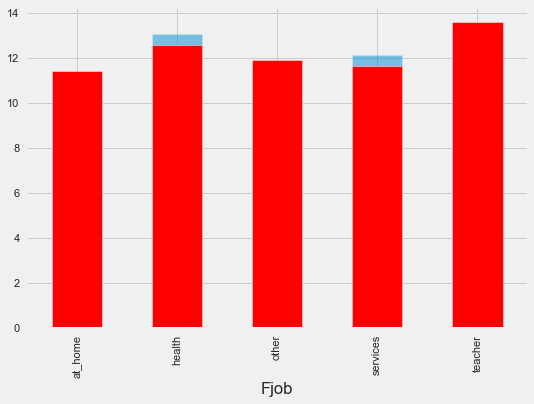

In [161]:
x = p_orig.groupby(['Mjob'])['G3'].mean().plot(kind='bar', stacked=True, alpha=.5)
x =p_orig.groupby(['Fjob'])['G3'].mean().plot(kind='bar', stacked=True, color='red', alpha=1)

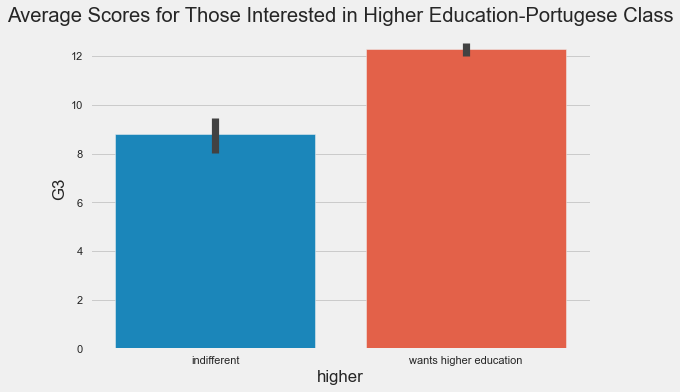

In [218]:
# Average score for those who want to go on to higher education vs those who do not 
sns.barplot(x=p_feature.higher, y=p_orig.G3);
plt.savefig('higher_mean_g3.png')
plt.xticks(ticks=[0,1], labels=['indifferent', 'wants higher education'])
plt.title('Average Scores for Those Interested in Higher Education-Portugese Class')
plt.show;

## With a very small p-value, we can reject the null that wanting a higher education has no effect on your average g3 score. Looks like having ambitions is great for learning!

In [217]:
# t test for the above
ind = p_dummy[p_dummy['higher'] == 0]['G3']
wants = p_dummy[p_dummy['higher']==1]['G3']

t_stat, pval =  stats.ttest_ind(wants,ind)
print(t_stat, pval)


8.957815184466758 3.499659592830118e-18
